# Lab Assignment 09

## Group Members
    RAJENDRA KUJUR (214161008)
    ROHIT RAJ SINGH CHAUHAN (21416009)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Ellipse

In [2]:
def genRandPointsInRing(r_inner, r_outer, center, count_points):

    points = np.zeros((count_points, 2))
    for i in range(count_points):
        
        r = np.random.uniform(r_inner**2,r_outer**2, count_points)**0.5
        theta = np.random.uniform(0, 2*math.pi, count_points)

        points[i][0] = center[0] + r[i]*math.cos(theta[i])
        points[i][1] = center[1] + r[i]*math.sin(theta[i])

    return points

### Generating n = 250 points belonging to positive class in the circle r = 5

In [3]:
r_inner = 0
r_outer = 5
center_x = 0
center_y = 0
count_points = 250
positive_points = genRandPointsInRing(r_inner, r_outer, [center_x, center_y], count_points)

### Generating n = 350 points belonging to negative class in the ring where r_inner = 4, r_outer = 8

In [4]:
r_inner = 4
r_outer = 8
center_x = 0
center_y = 0
count_points = 350
negative_points = genRandPointsInRing(r_inner, r_outer, [center_x, center_y], count_points)

### Display the scatter plot of the positive  class points and negative class points in red and blue colors  respectively.

In [5]:
def display(positive_points, negative_points):
    x_positive = np.array([positive_points[i][0] for i in range(len(positive_points))]).reshape(len(positive_points), 1)
    x_negative = np.array([negative_points[i][0] for i in range(len(negative_points))]).reshape(len(negative_points), 1)
    
    y_positive = np.array([positive_points[i][1] for i in range(len(positive_points))]).reshape(len(positive_points), 1)
    y_negative = np.array([negative_points[i][1] for i in range(len(negative_points))]).reshape(len(negative_points), 1)

    plt.figure(figsize=(4, 4))
    plt.scatter(x_positive, y_positive, color = 'red')
    plt.scatter(x_negative, y_negative, color = 'blue')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Scatter Plot of points')
    plt.show()

    return x_positive, y_positive, x_negative, y_negative

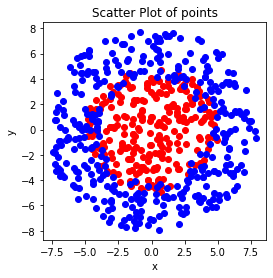

In [6]:
x_pos, y_pos, x_neg, y_neg = display(positive_points, negative_points)

### (c) Use the Chebyshev inequality-based classifier on the positive class  points and plot the ROC by varying the threshold 𝜆 in the interval [0.01,10] in steps of 0.05.

In [8]:
def classificationUsingChebyshev(positive_points, negative_points):
    x_positive = np.array([positive_points[i][0] for i in range(len(positive_points))]).reshape(len(positive_points), 1)
    x_negative = np.array([negative_points[i][0] for i in range(len(negative_points))]).reshape(len(negative_points), 1)

    y_positive = np.array([positive_points[i][1] for i in range(len(positive_points))]).reshape(len(positive_points), 1)
    y_negative = np.array([negative_points[i][1] for i in range(len(negative_points))]).reshape(len(negative_points), 1)

    Lambda = np.arange(0.01, 10, 0.05)

    mean_positive = np.mean(positive_points, axis=0)
    var_positive = np.var(positive_points, axis=0)

    true_positive_rate = []
    false_positive_rate = []
    true_negative_rate = []
    false_negative_rate = []

    for i in range(len(Lambda)):
        
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0

        for k in range(len(positive_points)):
            for_positive_x = (x_positive[k] - mean_positive[0])**2 <= (Lambda[i]**2)*var_positive[0]
            for_positive_y = (y_positive[k] - mean_positive[1])**2 <= (Lambda[i]**2)*var_positive[1]

            if for_positive_x and for_positive_x :
                true_positive += 1
            else:
                false_negative += 1

        for k in range(len(negative_points)):
            for_negative_x = (x_negative[k] - mean_positive[0])**2 <= (Lambda[i]**2)*var_positive[0]
            for_negative_y = (y_negative[k] - mean_positive[1])**2 <= (Lambda[i]**2)*var_positive[1]

            if for_negative_x and for_negative_y :
                false_positive += 1
            else:
                true_negative += 1

        true_positive_rate.append(true_positive/ (true_positive + false_negative))
        true_negative_rate.append(true_negative/ (true_negative + false_positive))
        false_positive_rate.append(false_positive / (false_positive + true_negative))
        false_negative_rate.append(false_negative / (false_negative + true_positive))

    plt.plot(false_positive_rate, true_positive_rate, )
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.grid()
    plt.show()
    return false_positive_rate, true_positive_rate 

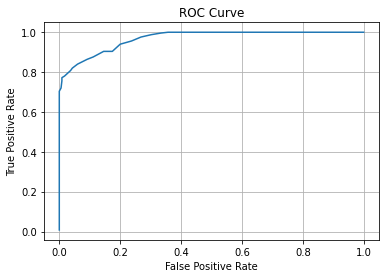

In [9]:
line_x, line_y = classificationUsingChebyshev(positive_points, negative_points)

### (d) Experiment with non-overlapping classes ( 𝑟௖௜௥௖௟௘ <𝑟௜௡௡௘௥ ) and overlapping classes (𝑟௖௜௥௖௟௘ >𝑟௜௡௡௘௥) and plot the ROCs for the same. Please note that 𝑟௢௨௧௘௥ is always greater than 𝑟௖௜௥௖௟௘ and 𝑟௜௡௡௘௥. 

In [10]:
x_pos, y_pos, x_neg, y_neg = [], [], [], []
line_x, line_y = [], []

#### Test Case 01

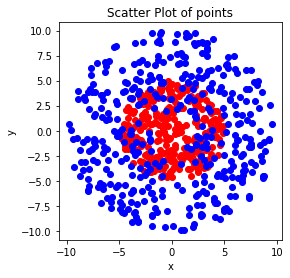

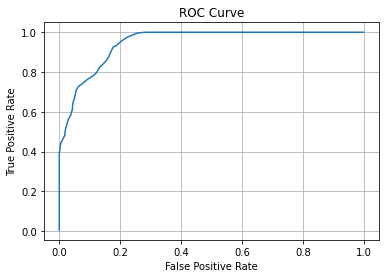

In [11]:
positive_points = genRandPointsInRing(0, 5, [0, 0], 300)
negative_points = genRandPointsInRing(2, 10, [0, 0], 400)

x1, y1, x2, y2 = display(positive_points, negative_points)
line1, line2 = classificationUsingChebyshev(positive_points, negative_points)
x_pos.append(x1)
y_pos.append(y1)
x_neg.append(x2)
y_neg.append(y2)
line_x.append(line1)
line_y.append(line2)

#### Test Case 02

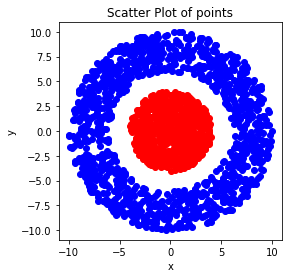

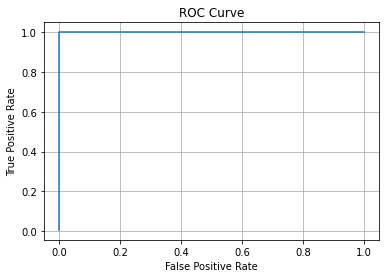

In [12]:
positive_points = genRandPointsInRing(0, 4, [0, 0], 700)
negative_points = genRandPointsInRing(6, 10, [0, 0], 1200)

x1, y1, x2, y2 = display(positive_points, negative_points)
line1, line2 = classificationUsingChebyshev(positive_points, negative_points)
x_pos.append(x1)
y_pos.append(y1)
x_neg.append(x2)
y_neg.append(y2)
line_x.append(line1)
line_y.append(line2)

#### Test Case 03

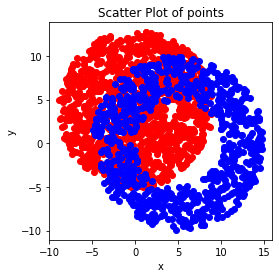

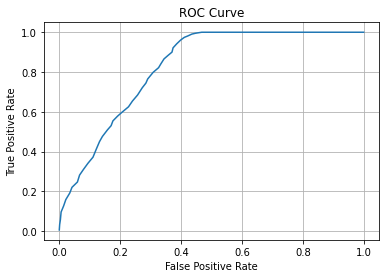

In [13]:
positive_points = genRandPointsInRing(0, 9, [0, 4], 1200)
negative_points = genRandPointsInRing(5, 10, [5, 0], 840)

x1, y1, x2, y2 = display(positive_points, negative_points)
line1, line2 = classificationUsingChebyshev(positive_points, negative_points)
x_pos.append(x1)
y_pos.append(y1)
x_neg.append(x2)
y_neg.append(y2)
line_x.append(line1)
line_y.append(line2)

#### Test Case 04

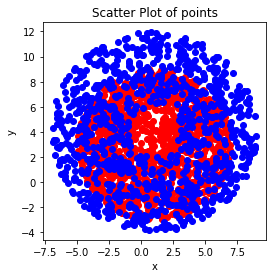

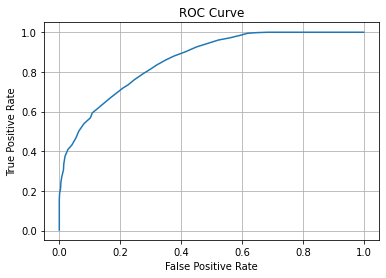

In [14]:
positive_points = genRandPointsInRing(0, 6, [1, 3], 1200)
negative_points = genRandPointsInRing(2, 8, [1, 4], 950)

x1, y1, x2, y2 = display(positive_points, negative_points)
line1, line2 = classificationUsingChebyshev(positive_points, negative_points)
x_pos.append(x1)
y_pos.append(y1)
x_neg.append(x2)
y_neg.append(y2)
line_x.append(line1)
line_y.append(line2)

#### Test Case 05

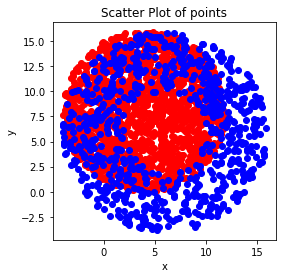

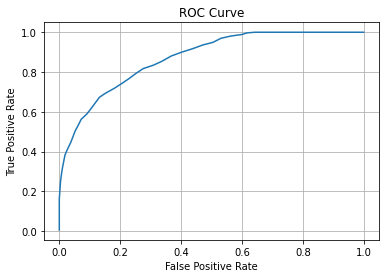

In [15]:
positive_points = genRandPointsInRing(0, 8, [4, 8], 1600)
negative_points = genRandPointsInRing(4, 10, [6, 6], 750)

x1, y1, x2, y2 = display(positive_points, negative_points)
line1, line2 = classificationUsingChebyshev(positive_points, negative_points)
x_pos.append(x1)
y_pos.append(y1)
x_neg.append(x2)
y_neg.append(y2)
line_x.append(line1)
line_y.append(line2)

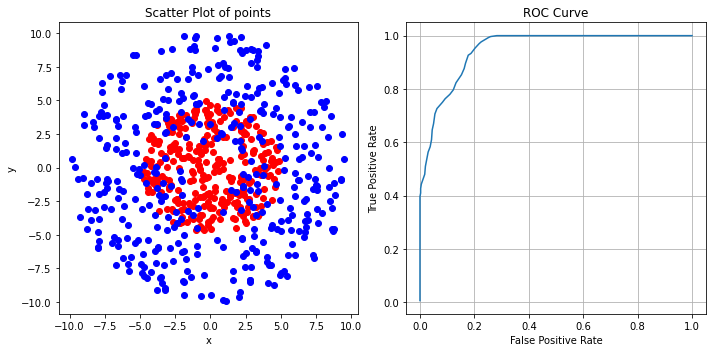

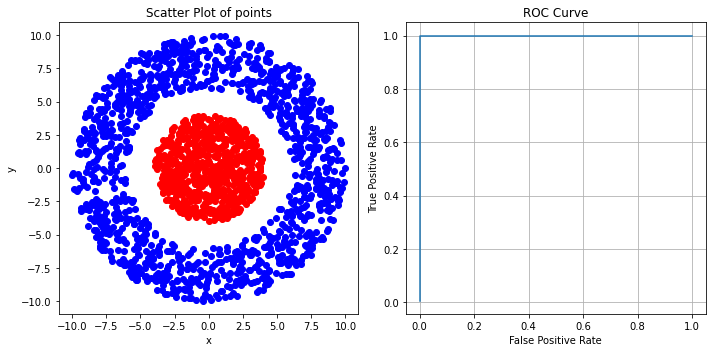

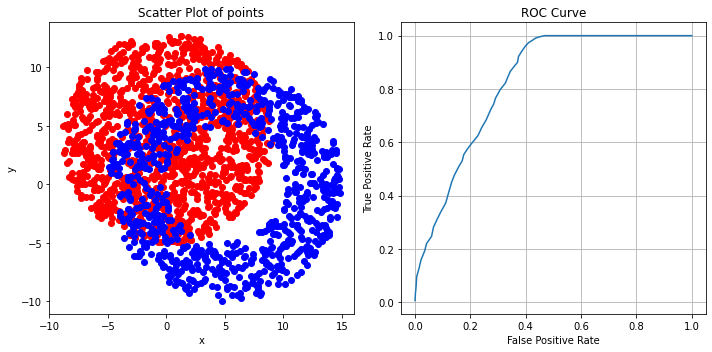

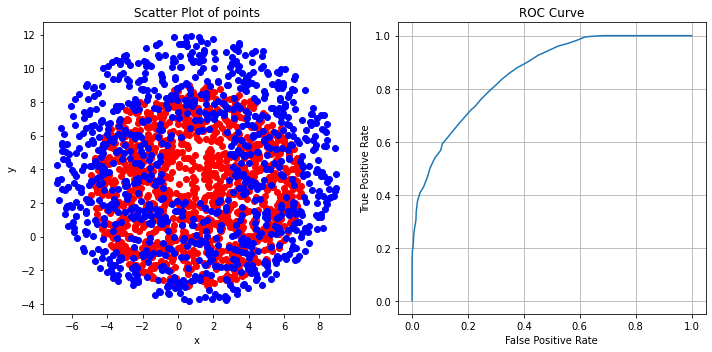

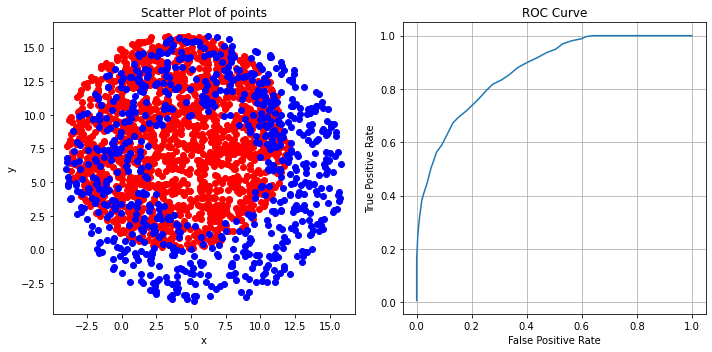

In [16]:
def plotAll(x_pos, y_pos, x_neg, y_neg, line_x, line_y):
    for i in range(5):

        plt.subplots(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(x_pos[i], y_pos[i], color = 'red')
        plt.scatter(x_neg[i], y_neg[i], color = 'blue')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Scatter Plot of points')

        plt.subplot(1, 2, 2)
        plt.plot(line_y[i], line_x[i])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title('ROC Curve')
        plt.grid()

        plt.tight_layout()
        plt.show()

plotAll(x_pos, y_pos, x_neg, y_neg, line_y, line_x)

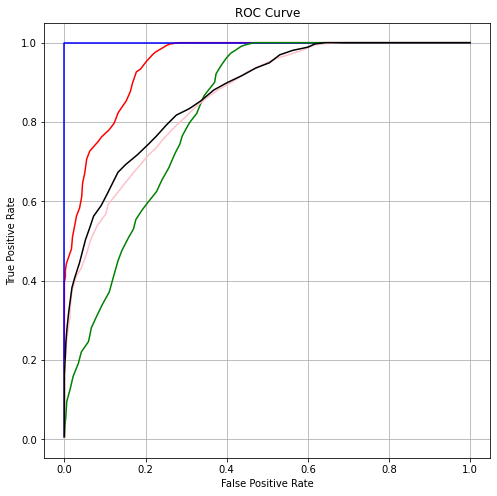

In [17]:
col = ['red', 'blue', 'green', 'pink', 'black']
plt.figure(figsize=(8, 8))
for i in range(5):
    plt.plot(line_x[i], line_y[i], color = col[i])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.grid()

plt.show()

## 2. Incremental Clustering 

### (a) Write a function 𝑔𝑒𝑛𝑒𝑟𝑎𝑡𝑒𝑃𝑜𝑖𝑛𝑡𝐹𝑟𝑜𝑚𝑅𝑎𝑛𝑑𝑜𝑚𝐶𝑙𝑢𝑠𝑡𝑒𝑟( ) that randomly generates a point in 𝑹ଶ. The point must lie within any one of the following 𝑁 =17 circles {𝑪௜;𝑖 =1,...𝑁} that are specified in the  (𝐶𝑒𝑛𝑡𝑒𝑟−𝑋 ,𝐶𝑒𝑛𝑡𝑒𝑟−𝑌,𝑅𝑎𝑑𝑖𝑢𝑠) format. (0, 0, 10) ; (0, 50, 15) ; (50, 0, 15) ; (0,-50, 15) ; (-50, 0, 15) ; (35, 35, 15) ; (35,-35, 15) ; (-35, 35, 15) ; (-35,-35, 15) ; (0, 100, 20) ; (100, 0, 20) ; (0,-100, 20) ; (-100, 0, 20) ; (70, 70, 20) ; (70,-70, 20) ; (-70, 70, 20) ; (-70,-70, 20). Any particular call to this function randomly chooses a circle and generates a point within it.

In [18]:
circles = np.array([[0, 0, 10], [0, 50, 15], [50, 0, 15], [0, -50, 15], [-50, 0, 15], [35, 35, 15], [35, -35, 15], [-35, 35, 15], [-35, -35, 15], [0, 100, 20], [100, 0, 20], [0, -100, 20], [-100, 0, 20], [70, 70, 20], [70, -70, 20], [-70, 70, 20], [-70, -70, 20]])

In [19]:
def generatePointFromRandomCluster():
    circle_number = np.random.randint(0, 17)

    r_inner = 0
    r_outer = circles[circle_number][2]
    center = [circles[circle_number][0], circles[circle_number][1]]

    point = (genRandPointsInRing(r_inner, r_outer, center, count_points = 1))

    return point

### (b) The data point 𝑥௧ ∈𝑪௜ (𝑖 =1...𝑁) at each instant is obtained using  the function 𝑔𝑒𝑛𝑒𝑟𝑎𝑡𝑒𝑃𝑜𝑖𝑛𝑡𝐹𝑟𝑜𝑚𝑅𝑎𝑛𝑑𝑜𝑚𝐶𝑙𝑢𝑠𝑡𝑒𝑟( ). Perform the incremental clustering with default variance 𝑣ௗ =10 and Chebychev inequality threshold 𝜆=3.

In [20]:
def makeNewCluster(mu, var, prior):
    newcluster = np.array([mu, var, prior], dtype=object).reshape(1,3)
    return newcluster

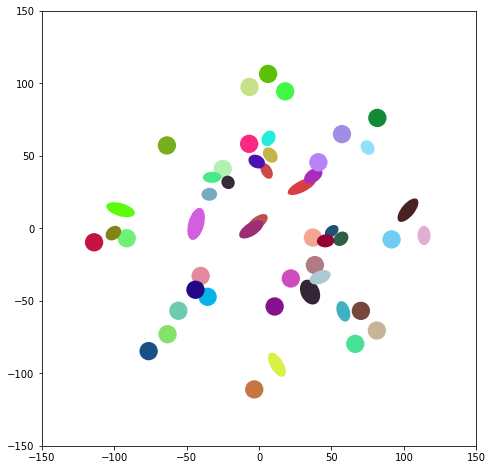

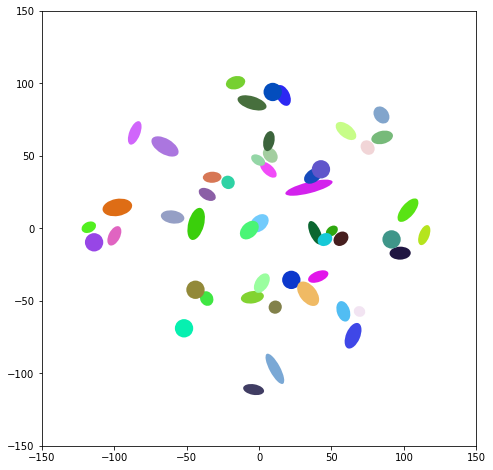

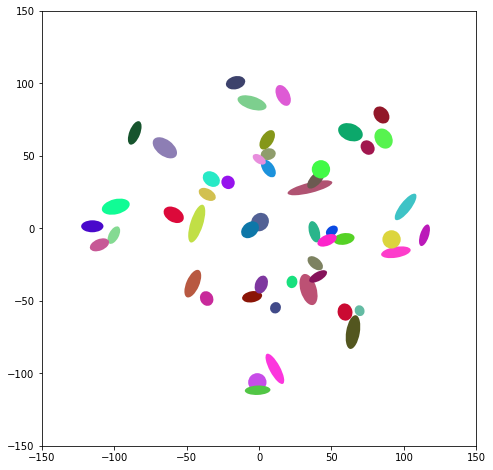

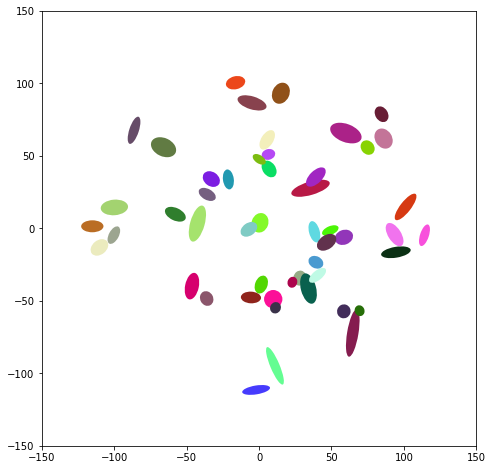

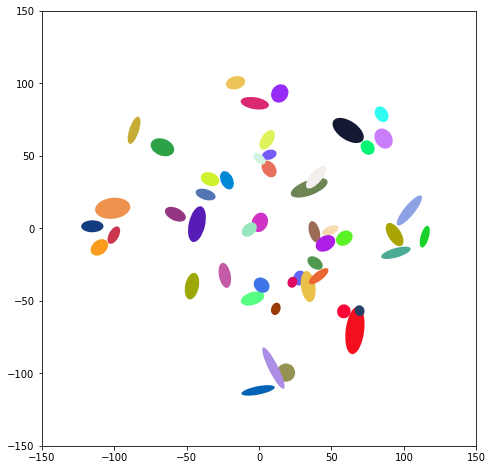

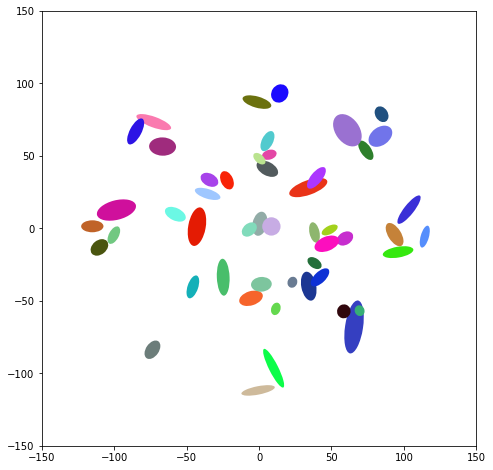

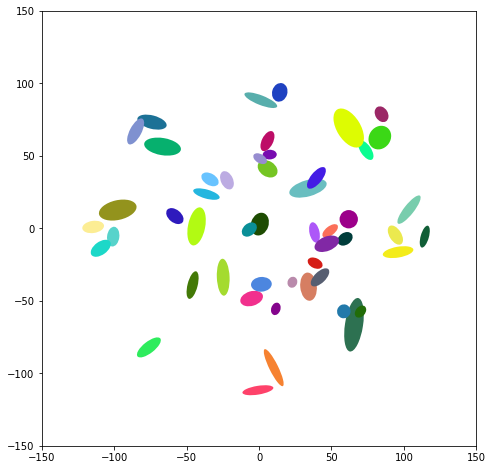

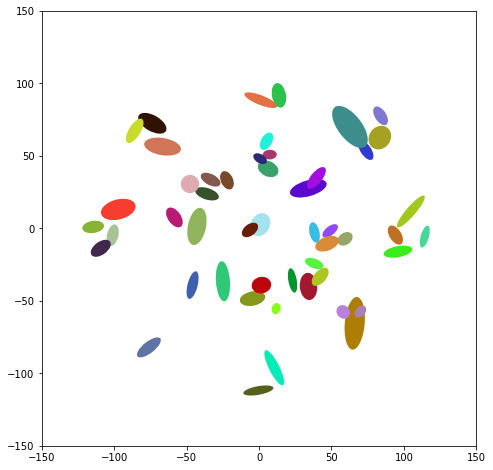

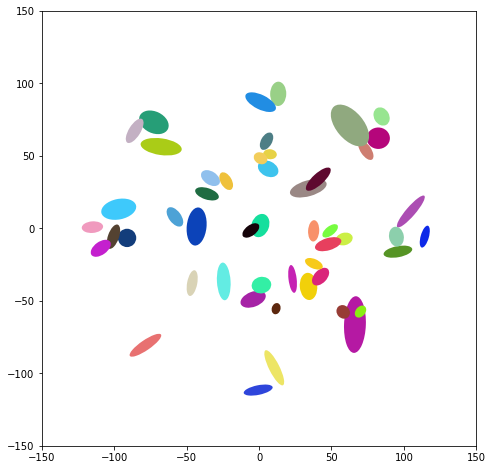

In [21]:
cov_mat = np.array([[10, 0],[0, 10]])
l = 3
point = generatePointFromRandomCluster()

# make first cluster and append into G
n = 1
new_cluster = makeNewCluster(point, cov_mat, 1/n)
G = new_cluster

for maxiter in range(1, 1000):
    point = generatePointFromRandomCluster()
    n += 1

    # calculate point's distance with all the existing clusters
    dist = []
    for k in range(len(G)):
        d_j = np.dot((point - G[k, 0]), np.dot(np.linalg.pinv(G[k, 1]), (point - G[k, 0]).T))
        d_j = d_j.flatten()
        dist.append(d_j[0])
    dist = np.array(dist)
    
    # store the indices if it satisfies inequality
    index = []
    for k in range(len(G)):
        if dist[k] <= l**2:
            index.append(k)
    
    # if we find some cluster satisfying inequality
    if len(index) != 0:
        # find cluster which are at minimum distance
        min_dist_idx = np.argmin(dist)

        # update prior of all the clusters
        for k in range(len(G)):
            if k == min_dist_idx:
                G[k, 2] = (1-(1/n))*G[k, 2] + (1/n)
            else:
                G[k, 2] = (1-(1/n))*G[k, 2]

        beta = (1/(n*G[min_dist_idx, 2]))
        # update mean and variance for the cluster which took the generated point
        G[min_dist_idx, 1] = (1-beta)*(G[min_dist_idx, 1] + (beta)*(np.dot((point-G[min_dist_idx, 0]).T, (point - G[min_dist_idx, 0]))))
       
        G[min_dist_idx, 0] = (1-beta)*(G[min_dist_idx, 0]) + (beta)*point
    # if we don't have any cluster satisfying inequality
    else:
        # if we reach max cluster count
        if len(G) >= 50:
            idx = np.argmin(G[:,2])

            # number of points going to be removed 
            n_removed = G[idx, 2]*(n-1)

            # assign a new cluster
            G[idx, :] = makeNewCluster(point, cov_mat, 1/(n-1))

            # update the number of points due to exclusion of a cluster
            # update prior values of all the clusters accordingly
            for k in range(len(G)):
                cur_n = G[k, 2]*(n-1)
                upd_n = (cur_n)/(n-n_removed)
                G[k, 2] = upd_n

            n = n - n_removed

        # if we have to create a new cluster since we haven't reached the required cluster count
        else:
            G = np.append(G, makeNewCluster(point, cov_mat, 0), axis=0)
            # update prior values for alll the clusters
            for k in range(len(G)):
                if k == (len(G)-1):
                    G[k, 2] = (1-(1/n))*G[k, 2] + (1/n)
                else:
                    G[k, 2] = (1-(1/n))*G[k, 2]

    if maxiter % 100 == 0:
        e = []
        for i in range(len(G)):

            # fetch eigen values and vectors
            eig_val, eig_vec = np.linalg.eig(G[i, 1])
            id_max = np.argmax(eig_val)
            id_min = np.argmin(eig_val)

            # calculate the semi-minor and semi-major axis
            semi_major = 2*math.sqrt(eig_val[id_max])
            semi_minor = 2*math.sqrt(eig_val[id_min])
            theta = np.arctan(eig_vec[id_max][1]/eig_vec[id_max][0])*(180/np.pi)

            r = G[i, 0]
            e.append(Ellipse((r[0][0], r[0][1]), 2*semi_major, 2*semi_minor, theta))

        plt.figure(figsize=(8,8))
        a = plt.subplot(111, aspect='equal')

        for k in e:
            k.set_clip_box(a.bbox)
            a.add_artist(k)
            k.set_facecolor(np.random.rand(3))

        a.set_xlim(-150, 150)
        a.set_ylim(-150, 150)

        plt.show()

### 3. Consider the MNIST dataset used in Assignment 7. Use 50000 images (5000 for each hand-written digit category) for train set and 10000 (1000 for each category) for test set. Perform PCA on the train set and  save the linear transformation parameters 𝝁∈ℝ଻଺଼ and 𝑄 ∈ℝ଻଺଼×ௗ. Here, 𝑑 is the dimension of the target lower dimensional space. Using {𝝁,𝑄}, project train set images Ω௜ (௧௥௔௜௡) and test set images Ω௝ (௧௘௦௧) to  respective vector embeddings 𝒙௜ (௧௥௔௜௡) and 𝒙௝ (௧௘௦௧) ( 𝑖 =1,...50000 , 𝑗=1,...10000). Learn 10 Gaussian Mixture Models 𝐺𝑀𝑀௞ (𝑘 =1,...10) from the training data set ൛𝒙(௧௥௔௜௡)ൟ of each digit category. Each GMM should have 𝐾 modes. All modes should have diagonal covariance matrices. Classify each instance from the test set ൛𝒙(௧௘௦௧)ൟ by using the Bayes Classifier with MAP Rule. The likelihood for each category should be generated by using the corresponding GMM learned from the train  set. Vary the value of the number of GMM modes (𝐾 =1,5,10,...50) and report the Total Accuracy and F1 -Score of each digit category for different values of 𝐾.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import numpy as np
from sklearn.mixture import GaussianMixture as mix

In [22]:
df=pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
label=df['label']
label=np.array(label).reshape(42000,1)
label.shape

(42000, 1)

In [24]:
df=df.drop('label',axis=1)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
pd.unique(label.flatten())

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [26]:
trainx=[]
testx=[]
for i in range(10):
    DF=[]
    idx=[]
    idx=np.copy(np.array(np.where(label[:,0] == i)).flatten())
    DF.append(df.iloc[idx])
    DF=np.array(DF)
    DF=DF.reshape(-1,784)
    trainx.append(DF[0:3500])
    testx.append(DF[3500:3700])

In [27]:
trainx=np.array(trainx)
trainx=trainx.reshape(-10,784)
trainx.shape

(35000, 784)

In [28]:
testx=np.array(testx)
testx=testx.reshape(-10,784)
testx.shape

(2000, 784)

In [29]:
# Calculate mean
mu=trainx.mean(axis=0)
mu = mu.reshape((1,784))
mu.shape

# mean adjusted
Y = trainx - mu

# calculate covariance matrix
C = np.cov(Y.T)
EigenValues, EigenVector = eigh(C)

# sort and reverse the eigen values indices
d=250
idx=np.argpartition(EigenValues,-d)[-d:]
Q=EigenVector[:,idx]

#projecting the training data to a lower dimension 
v=np.dot(Q.T,Y.T).T
v.shape

(35000, 250)

In [30]:
w=testx-mu
V=np.dot(w,Q)

In [31]:
def GMM(v,k,testx,mu,Q):
    m=[]
    for i in range(10):
        a=i*3500
        b=(i+1)*3500
        m.append(mix(n_components = k, init_params='kmeans',n_init = 1, max_iter = 100, covariance_type = 'diag').fit(v[a:b,:]))
        
    p=np.zeros((2000,10))
    for i in range(2000):
        for j in range(10):
            s=m[j].score_samples(V[i,:].reshape(1,250))
            p[i,j]=s
    
    pred=[]
    for i in range(2000):
        pred.append(np.argmax(p[i,:]))
    
    TP=[0,0,0,0,0,0,0,0,0,0]
    TPFP=[0,0,0,0,0,0,0,0,0,0]
    for i in range(len(pred)):
        TPFP[pred[i]]+=1
        true_label=i//200
        if(pred[i]==true_label):
            TP[pred[i]]+=1
    acr=sum(TP)/2000
    a1=np.array(TP)
    a2=np.array(TPFP)
    prec=a1/a2
    rec=a1/200
    F1=2/(np.reciprocal(prec)+np.reciprocal(rec))
    return acr,F1

In [32]:
k=1
acc,f=GMM(v,k,testx,mu,Q)
print("k=1\n\n","Accuracy:",acc,"\n\nF1 Score:",f)

k=1

 Accuracy: 0.8545 

F1 Score: [0.94387755 0.96675192 0.75053305 0.83838384 0.82417582 0.8622449
 0.87792208 0.8772846  0.84289277 0.78688525]


In [33]:
k=5
acc,f=GMM(v,k,testx,mu,Q)
print("k=5\n\n","Accuracy:",acc,"\n\nF1 Score:",f)

k=5

 Accuracy: 0.8885 

F1 Score: [0.96202532 0.96482412 0.88669951 0.86716792 0.88188976 0.85507246
 0.90339426 0.87218045 0.88262911 0.81203008]


In [34]:
k=10
acc,f=GMM(v,k,testx,mu,Q)
print("k=5\n\n","Accuracy:",acc,"\n\nF1 Score:",f)

k=5

 Accuracy: 0.8855 

F1 Score: [0.95189873 0.96534653 0.88220551 0.83046683 0.88250653 0.87841191
 0.90673575 0.86432161 0.87619048 0.81975309]


In [35]:
k=20
acc,f=GMM(v,k,testx,mu,Q)
print("k=5\n\n","Accuracy:",acc,"\n\nF1 Score:",f)

C:\Users\Rajendra Kujur\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\Rajendra Kujur\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


k=5

 Accuracy: 0.9005 

F1 Score: [0.95696203 0.97512438 0.93       0.86552567 0.885      0.87309645
 0.92783505 0.87594937 0.88995215 0.82706767]


In [36]:
k=30
acc,f=GMM(v,k,testx,mu,Q)
print("k=5\n\n","Accuracy:",acc,"\n\nF1 Score:",f)

C:\Users\Rajendra Kujur\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


k=5

 Accuracy: 0.92 

F1 Score: [0.96410256 0.97524752 0.93266833 0.89108911 0.90680101 0.91
 0.94087404 0.91315136 0.90384615 0.86363636]


In [37]:
k=40
acc,f=GMM(v,k,testx,mu,Q)
print("k=5\n\n","Accuracy:",acc,"\n\nF1 Score:",f)

k=5

 Accuracy: 0.9205 

F1 Score: [0.96410256 0.96774194 0.93969849 0.88059701 0.92620865 0.89795918
 0.94444444 0.90909091 0.91041162 0.86699507]
